In [1]:
from joblib import load
import pandas as pd
import code.operators as ops
import seaborn as sns
import statistics

#  Case Study 1 - Loan Default Prediction

In [3]:
data = pd.read_csv('x_train.csv', index_col=['Loan_ID'])
#svc_bias = load('svc_loan_bias.joblib')
lr_bias = load('lr_loan_bias.joblib')
lr = load('lr_loan.joblib')
#svc = load('svc_loan.joblib')

In [4]:
X_new = ops.data_generator_fd(data)

In [5]:
X_new.describe()

,Gender,Education,Self_Employed,Credit_History,Property_Area_Semiurban,Property_Area_Urban,ln_monthly_return,ln_total_income,ln_LoanAmount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.482000,0.505000,0.495000,0.850955,0.49000,0.530000,0.359907,-0.369836,-0.956995
std,0.499926,0.500225,0.500225,0.367409,0.50015,0.499349,22.937976,21.210169,23.263947
min,0.000000,0.000000,0.000000,-0.284143,0.00000,0.000000,-79.496095,-66.201079,-71.759055
25%,0.000000,0.000000,0.000000,0.602265,0.00000,0.000000,-14.962829,-14.506299,-16.769710
50%,0.000000,1.000000,0.000000,0.844822,0.00000,1.000000,-0.452890,-0.484405,-0.360056
75%,1.000000,1.000000,1.000000,1.094865,1.00000,1.000000,16.601722,12.976165,14.742157
max,1.000000,1.000000,1.000000,2.115157,1.00000,1.000000,81.785607,73.185261,69.569677


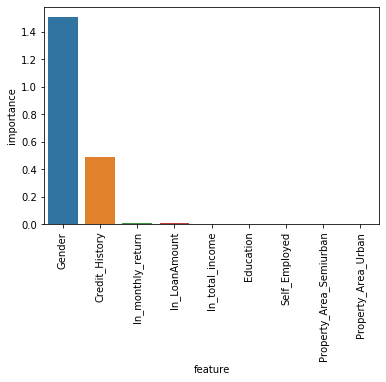

In [5]:
ops.plot_feature_importance(x='feature', y='importance', data=ops.feature_importance(lr_bias, X_new))

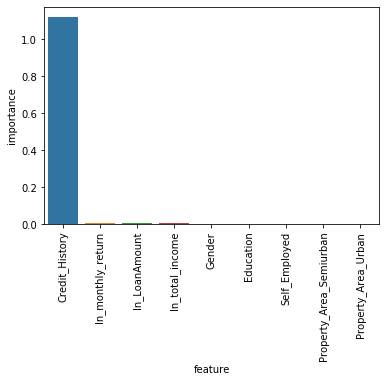

In [6]:
ops.plot_feature_importance(x='feature', y='importance', data=ops.feature_importance(lr, X_new))

In [7]:
pred_n_bias = ops.create_eval(lr_bias, X_new)
pred_n = ops.create_eval(lr, X_new)

In [8]:
ops.calc_disparity_index(pred_n_bias, 'Pred', 'Gender',0)

1-min(DI, 1/DI): 0.888
There is a potential bias


In [9]:
ops.calc_stat_parity(pred_n_bias, 'Pred', 'Gender',0)

-0.666
There is a potential bias


In [10]:
ops.calc_mean_diff(pred_n_bias, 'Pred', 'Gender',0)

-0.666
There is a potential bias


In [11]:
ops.equal_opportunity(X_new, pred_n_bias, 'Pred', 'Gender', 0)

-0.6810772501771793
There is a potential bias


In [13]:
ops.coeff_variation(X_new, pred_n_bias, 'Pred', 'Gender', 0)

0.5048389895599675
There is a potential bias


In [15]:
bina = ops.create_binary(pred_n_bias, 'Pred', 'Gender', 0)

In [16]:
ops.MetricTextExplainer_(bina).explain()

Consistency (Zemel, et al. 2013): [0.665]
Number of positive-outcome instances: 418.0
Mean difference (mean label value on privileged instances - mean label value on unprivileged instances): -0.6663306653226613
Statistical parity difference (probability of favorable outcome for unprivileged instances - probability of favorable outcome for privileged instances): -0.6663306653226613
Number of instances: 1000.0
Number of negative-outcome instances: 582.0
Disparate impact (probability of favorable outcome for unprivileged instances / probability of favorable outcome for privileged instances): 0.11214983157804972


# Case Study 2 - Credit Card Acceptance

In [10]:
data = pd.read_csv('x_train_cc.csv', index_col=0)
svc = load('svc_cc.joblib')
lr = load('lr_cc.joblib')

In [11]:
X_new = ops.data_generator_fd(data)
X_new.describe()

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.472000,32.031124,4.468732,0.984000,0.981000,6.451000,4.027000,2.250091,0.52000,0.514000,33.323000,0.493000,1.035000,84.992000,25441.280000
std,0.499465,11.965365,4.773155,0.798988,0.819335,4.139896,2.685793,3.172188,0.49985,0.500054,19.549395,0.500201,0.801509,49.066031,15301.714016
min,0.000000,-5.473756,-10.118394,0.000000,0.000000,0.000000,0.000000,-7.828309,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000
25%,0.000000,23.867486,1.288286,0.000000,0.000000,3.000000,2.000000,0.117706,0.00000,0.000000,16.000000,0.000000,0.000000,43.750000,11938.250000
50%,0.000000,32.510950,4.569552,1.000000,1.000000,6.500000,4.000000,2.322288,1.00000,1.000000,33.000000,0.000000,1.000000,86.000000,24882.000000
75%,1.000000,40.071209,7.687575,2.000000,2.000000,10.000000,6.000000,4.397632,1.00000,1.000000,50.000000,1.000000,2.000000,127.000000,39570.500000
max,1.000000,70.432119,17.983044,2.000000,2.000000,13.000000,8.000000,12.924159,1.00000,1.000000,67.000000,1.000000,2.000000,169.000000,51044.000000


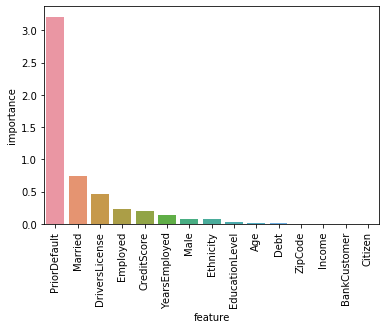

In [12]:
ops.plot_feature_importance(x='feature', y='importance', data=ops.feature_importance(lr, X_new))

In [13]:
pred_n = ops.create_eval(lr, X_new)
pred_n.head(10)

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Pred
0,0,50.086279,7.387547,2,0,12,6,2.376328,1,1,38,0,1,5,29469,0
1,1,35.119213,10.450099,1,1,11,0,-2.116801,1,0,27,1,1,94,33996,0
2,1,22.050783,7.932599,2,1,10,8,3.994158,1,1,37,0,1,39,20799,0
3,0,26.144043,4.014169,2,2,1,0,-2.774414,1,0,65,0,0,1,22979,0
4,0,30.424791,-1.316719,0,2,0,8,0.361104,1,0,24,0,0,81,2865,0
5,0,40.273311,1.107160,1,1,8,1,0.142672,1,1,9,1,1,62,2845,0
6,0,19.543258,-9.710943,1,1,2,3,3.914351,1,0,14,0,1,165,6289,0
7,0,18.893136,6.119417,1,1,5,5,6.213175,1,1,67,0,1,102,11307,0
8,0,49.740500,9.047217,0,1,11,8,2.921239,1,0,62,0,0,61,40252,0
9,1,15.849249,3.319018,2,2,1,7,3.856131,1,0,55,1,1,53,46468,0


In [14]:
ops.calc_disparity_index(pred_n, 'Pred', 'Ethnicity', 4)

1-min(DI, 1/DI): 0.17
The algorithm can be considered to be not biased


In [15]:
ops.calc_stat_parity(pred_n, 'Pred', 'Ethnicity',4)

0.002
The algorithm can be considered to be not biased


In [16]:
ops.calc_mean_diff(pred_n, 'Pred', 'Ethnicity',4)

0.002
The algorithm can be considered to be not biased


In [17]:
ops.equal_opportunity(X_new, pred_n, 'Pred', 'Ethnicity', 4)

-0.0022222222222222222
The algorithm can be considered to be not biased


In [18]:
ops.coeff_variation(X_new, pred_n, 'Pred', 'Ethnicity', 4)

0.024460962550169735
The algorithm can be considered to be not biased


In [20]:
bina = ops.create_binary(pred_n, 'Pred', 'Ethnicity', 4)
ops.MetricTextExplainer_(bina).explain()

Mean difference (mean label value on privileged instances - mean label value on unprivileged instances): 0.0018082757972852376
Consistency (Zemel, et al. 2013): [0.9872]
Number of positive-outcome instances: 9.0
Number of instances: 1000.0
Disparate impact (probability of favorable outcome for unprivileged instances / probability of favorable outcome for privileged instances): 1.2047872340425532
Statistical parity difference (probability of favorable outcome for unprivileged instances - probability of favorable outcome for privileged instances): 0.0018082757972852376
Number of negative-outcome instances: 991.0


# Case Study 3 - Generic User Input

In [6]:
mock = pd.read_csv('mock_input.csv')
#mock

In [7]:
X_new = ops.data_input(mock)
#print('The basic description of your simulated data is as follows:')
#X_new.describe()

The protected column is: column1


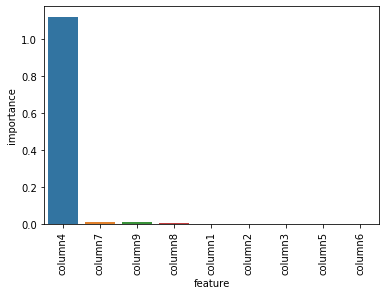

In [8]:
for c in mock[mock['protected']]['col_id']: c
ops.plot_feature_importance(x='feature', y='importance', data=ops.feature_importance(lr, X_new))
print('The protected column is:', c)

With an iteration of 100, the values
of the disparity index are shown below:


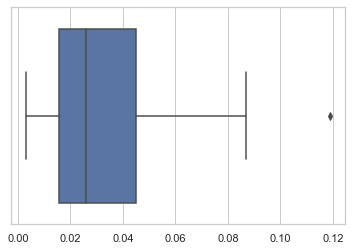

With an iteration of 100, the values
of the mean difference are shown below:


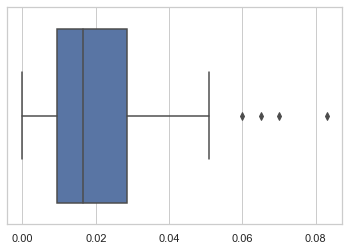

With an iteration of 100, the values
of the equal opportunity are shown below:


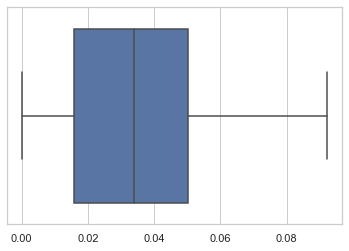

In [9]:
ops.create_boxplots(mock,lr,0)

In [8]:
ops.create_output(mock, lr, 0, 30)

,disparity_index,mean_difference,equal_opportunity,positive_outcomes
request_id,,,,
30,0.0277,0.02082,0.030492,0.748
